In [14]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

import seaborn as sns


In [15]:
x_test = pd.read_csv('x_smote_tomek_test.csv', sep=';')
y_test = pd.read_csv('y_smote_tomek_test.csv', sep=';')

In [28]:
x_train = pd.read_csv('x_smote_tomek_train.csv', sep=';')
y_train = pd.read_csv('y_smote_tomek_train.csv', sep=';')
x_train.head()

,amount,oldbalanceOrg,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.003763,0.358146,0.000134,1.0,0.0,0.0,0.0,0.0
1,0.006450,0.177587,0.001476,1.0,0.0,0.0,0.0,0.0
2,0.025567,0.000000,0.043822,0.0,1.0,0.0,0.0,0.0
3,0.045541,0.000345,0.001556,0.0,1.0,0.0,0.0,0.0
4,0.000586,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


# / Randmon Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

# // SMOTE

In [19]:
y_train = y_train.values.ravel()

In [23]:
model = RandomForestClassifier(max_depth=30, 
                               min_samples_split=2,
                               n_estimators=200)

In [24]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[199478    583]
 [  4413 195520]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    200061
           1       1.00      0.98      0.99    199933

    accuracy                           0.99    399994
   macro avg       0.99      0.99      0.99    399994
weighted avg       0.99      0.99      0.99    399994



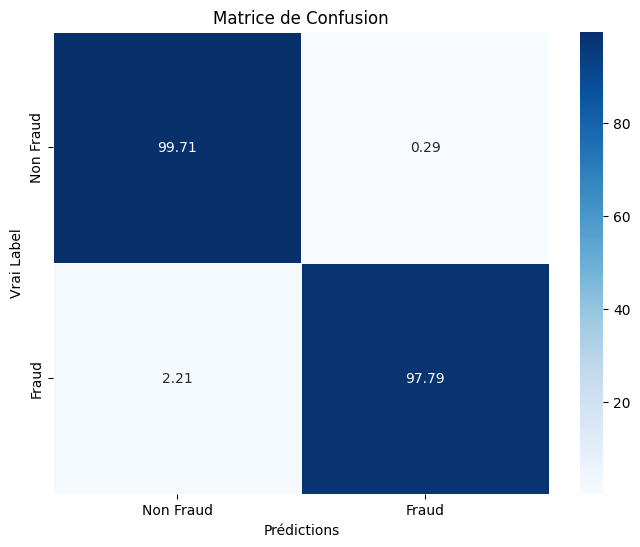

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5, xticklabels=["Non Fraud", "Fraud"], yticklabels=["Non Fraud", "Fraud"])
plt.title("Matrice de Confusion")
plt.ylabel("Vrai Label")
plt.xlabel("Prédictions")
plt.show()

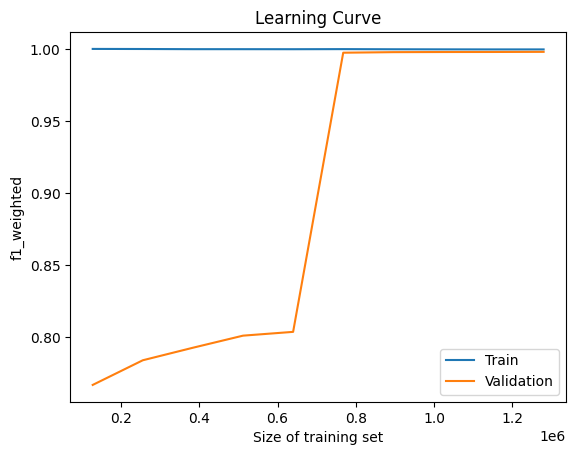

In [27]:
train_sizes, train_scores, val_scores = learning_curve(model, x_train, y_train, cv=5, scoring='f1_weighted', train_sizes=np.linspace(0.1,1,10))

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.xlabel('Size of training set')
plt.ylabel('f1_weighted')
plt.title('Learning Curve')
plt.legend()
plt.show()